In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

np.random.seed(0)

In [2]:
n_samples = 100
X = np.random.rand(n_samples, 1) - 0.5
y = 5 * X[:, 0] ** 2 + 0.1 * np.random.randn(n_samples)

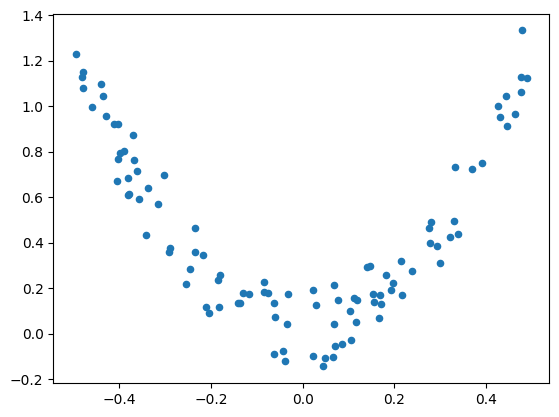

In [3]:
plt.scatter(X, y, s=20)
plt.savefig('figures/quadratic_data.pdf')

In [4]:
h1 = DecisionTreeRegressor(max_depth=2)
h1.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [5]:
F1 = [h1]  # ensemble of one tree
F1_pred = h1.predict(X)
print(f'R2 score of F1: {r2_score(y, F1_pred):.4f}')

R2 score of F1: 0.7819


In [6]:
h2 = DecisionTreeRegressor(max_depth=2)
y2 = y - F1_pred
h2.fit(X, y2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [7]:
F2 = [h1, h2] # ensemble of two trees
F2_pred = sum(h.predict(X) for h in F2)
print(f'R2 score of F2: {r2_score(y, F2_pred):.4f}')

R2 score of F2: 0.8802


In [8]:
h3 = DecisionTreeRegressor(max_depth=2)
y3 = y - F2_pred
h3.fit(X, y3)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [9]:
F3 = [h1, h2, h3] # ensemble of three trees
F3_pred = sum(h.predict(X) for h in F3)
print(f'R2 score of F3: {r2_score(y, F3_pred):.4f}')

R2 score of F3: 0.9124


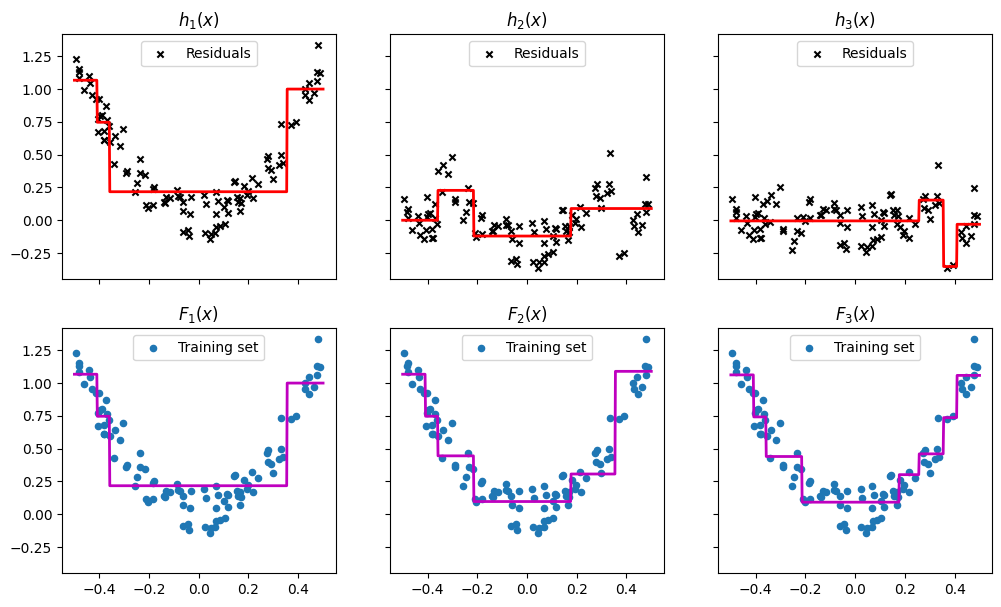

In [10]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 7))
X_test = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)

for i, h, residuals in zip([0, 1, 2], [h1, h2, h3], [y, y2, y3]):
    ax = axes[0, i]
    y_test_pred = h.predict(X_test)
    ax.scatter(X, residuals, c='k', s=20, marker='x', label='Residuals')
    ax.plot(X_test, y_test_pred, 'r', linewidth=2)
    ax.set_title(f'$h_{i + 1}(x)$')
    ax.legend(loc='upper center')

for i, ensemble in enumerate([F1, F2, F3]):
    ax = axes[1, i]
    y_test_pred = sum(h.predict(X_test) for h in ensemble)
    ax.scatter(X, y, s=20, label='Training set')
    ax.plot(X_test, y_test_pred, 'm', linewidth=2)
    ax.set_title(f'$F_{i + 1}(x)$')
    ax.legend(loc='upper center')
    
plt.savefig('figures/gradient_boosting_intro.pdf')